In [ ]:
#hide
# default_exp finite_diff

In [ ]:
#hide
from nbdev.showdoc import *

# Finite difference utils
Some simple utilities (and tests) for finite difference.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# define functions for getting stencile

def _get_dx_factors(num_points):
    """
    returns the factors of dx for each sampled point.

    EG, f(x - dx) + f(x) + f(x + dx) would return -1, 0, 1
    """
    assert num_points % 2 == 1, 'must use an odd number of points!'
    forward = np.arange(1, num_points // 2 + 1)
    backward = - forward[::-1]
    return np.concatenate([backward, [0], forward])


#export
def get_stencil(derivative: int, num_points: int, dx: float = 1.0) -> np.ndarray:
    """
    Create a symetric stencile for a defined derivative with a certain number of points.
    
    """    
    
    dx_factors = _get_dx_factors(num_points)
    
    power = np.power.outer(dx_factors, np.arange(len(dx_factors))).T
    fact = np.atleast_2d(factorial(np.abs(dx_factors)))
    
    kernel = power / fact
    
    y = np.zeros(len(kernel))
    y[derivative] = factorial(derivative) / (dx ** derivative)
    
    out = np.linalg.inv(kernel) @ y
    return out


#export
def apply_stencil(array, stencil):
    """Apply the stencil."""
    center_ind = len(stencil) // 2
    out = np.convolve(array, stencil[::-1], mode='same')
    return out
    

Test the stencil for known inputs

In [ ]:
assert np.allclose(get_stencil(1, 3), [-0.5, 0, 0.5])

In [ ]:
assert np.allclose(get_stencil(2, 3), [1, -2, 1])

# Stencil Tests
Test using numerical derivative with sin and first/second derivative.

$$
f = sin(ax + b)
$$

$$
f' = a \cdot cos(ax + b)
$$

$$
f'' = -a^2 \cdot sin(ax + b)
$$


In [ ]:
# x = np.linspace(0, 401, num=400)
x = np.arange(0, 80)

a = np.pi/16
b = 0
f = np.sin(a * x + b)
fp = a * np.cos(a * x + b)
fpp = -a**2 * np.sin(a * x + b)

# calculate dx
dx = np.mean(x[1:] - x[:-1])


# Approximate first derivative

In [ ]:
first_stencil = get_stencil(1, 3, dx=dx)

In [ ]:
fp_estimated = apply_stencil(f, first_stencil)

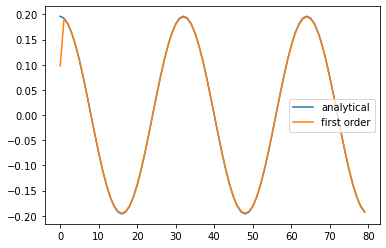

In [ ]:
plt.plot(fp, label='analytical')
plt.plot(fp_estimated, label='first order')
plt.legend()

In [ ]:
plt.show()

# Approximate second derivative

In [ ]:
second_stencil = get_stencil(2, 3, dx=dx)

In [ ]:
fpp_estimated = apply_stencil(f, second_stencil)

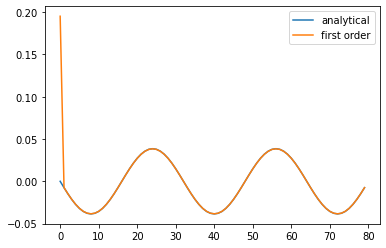

In [ ]:
plt.plot(fpp, label='analytical')
plt.plot(fpp_estimated, label='first order')
plt.legend()